In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from matplotlib.ticker import ScalarFormatter

import networkx as nx
from tqdm.notebook import tqdm, trange
import os
#import pandas as pd
#import seaborn as sns
from numba import jit, cuda
#from matplotlib.ticker import FormatStrFormatter
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import pickle

## Import Pretrained Networks

In [2]:
#@jit(target_backend='cuda')
def Net_Plot(G,gs):    
    pos=nx.kamada_kawai_layout(G)
    labels = {}
    for idx, node in enumerate(G.nodes()):
        labels[node] = idx

    fig_size = plt.rcParams["figure.figsize"]  
    fig_size[0] = gs; fig_size[1] = gs
    fig, ax = plt.subplots(1, 1, dpi=150)
    plt.rcParams["figure.figsize"] = fig_size  
    plt.title('')

    nx.draw_networkx_nodes(G, pos, node_size=100, node_color='red', alpha=0.4)
    nx.draw_networkx_edges(G, pos, width=0.35)
    nx.draw_networkx_labels(G, pos, labels, font_size=9)
    plt.box(False)
    plt.show()

In [3]:
# Read NARMA

# Define the variable to store the loaded graphs
GraphsN3_NARMA_Reps = []

# Iterate over each .gpickle file matching the pattern
for i in range(10):
    # Load the graph from the .gpickle file
    file_path = f"NARMA/NARMA[15]_Graphs_Pinp0.50_Pout0.50_Rp{i}.gpickle"

    with open(file_path, 'rb') as f:
        graph = pickle.load(f)

    GraphsN3_NARMA_Reps.append(graph)
        

# Net plot

501


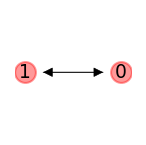

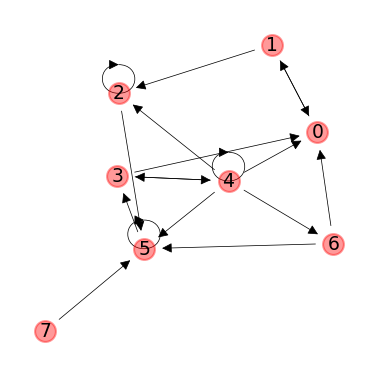

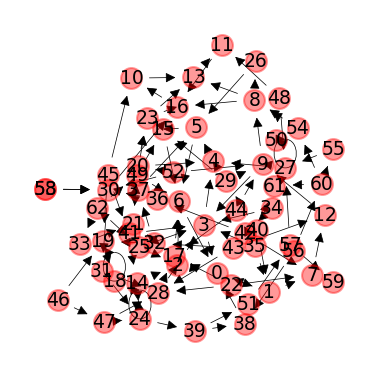

In [4]:
i=1
print(len(GraphsN3_NARMA_Reps[i]))

Net_Plot(GraphsN3_NARMA_Reps[i][0],1)
Net_Plot(GraphsN3_NARMA_Reps[i][8],3)
Net_Plot(GraphsN3_NARMA_Reps[i][-1],3)

In [5]:
# Read Chaos
import pickle

# Define the variable to store the loaded graphs
GraphsN3_Chaos_Reps = []

# Iterate over each .gpickle file matching the pattern
for i in range(10):
    # Load the graph from the .gpickle file
    file_path = f"Chaos/Chaos_Graphs_Pinp0.50_Pout0.50_Rp{i}.gpickle"

    with open(file_path, 'rb') as f:
        graph = pickle.load(f)

    GraphsN3_Chaos_Reps.append(graph)

25


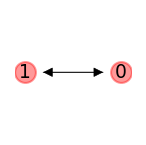

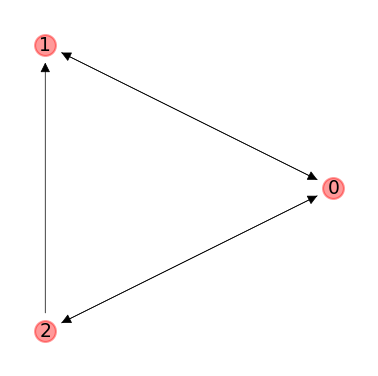

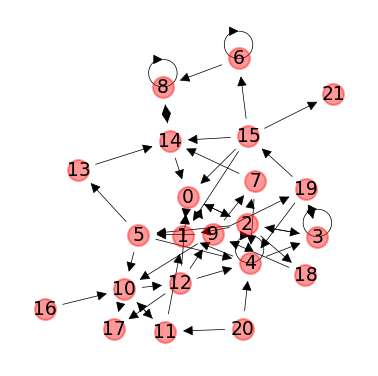

In [6]:
i=1
print(len(GraphsN3_Chaos_Reps[i]))

Net_Plot(GraphsN3_Chaos_Reps[i][0],1)
Net_Plot(GraphsN3_Chaos_Reps[i][1],3)
Net_Plot(GraphsN3_Chaos_Reps[i][-1],3)

In [7]:
#GraphsN3_Chaos_Reps[0][0].nodes(data=True)
GraphsN3_Chaos_Reps[1][-1].edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 1}), (0, 2, {}), (0, 9, {}), (1, 0, {'weight': 1}), (2, 0, {}), (2, 1, {}), (2, 3, {}), (2, 5, {}), (2, 7, {}), (2, 18, {}), (3, 2, {}), (3, 3, {}), (4, 2, {}), (4, 3, {}), (4, 1, {}), (4, 4, {}), (5, 4, {}), (5, 10, {}), (5, 13, {}), (6, 6, {}), (6, 8, {}), (7, 4, {}), (7, 14, {}), (8, 8, {}), (8, 14, {}), (9, 5, {}), (9, 7, {}), (9, 10, {}), (9, 19, {}), (10, 11, {}), (10, 12, {}), (10, 17, {}), (11, 10, {}), (11, 1, {}), (12, 0, {}), (12, 4, {}), (12, 9, {}), (12, 17, {}), (13, 14, {}), (14, 0, {}), (14, 8, {}), (15, 6, {}), (15, 14, {}), (15, 1, {}), (15, 0, {}), (15, 21, {}), (16, 10, {}), (18, 9, {}), (19, 15, {}), (19, 3, {}), (19, 4, {}), (20, 11, {}), (20, 4, {})])

In [8]:
# Read SinCos
import pickle

# Define the variable to store the loaded graphs
GraphsN3_SinCos2_Reps = []

# Iterate over each .gpickle file matching the pattern
for i in range(40, 50):
    # Load the graph from the .gpickle file
    file_path = f"SinCos/SinCos_NodeDel25_a[0]_b[1]_p[1]_Graphs_Pinp0.50_Pout0.50_Rp{i}.gpickle"

    with open(file_path, 'rb') as f:
        graph = pickle.load(f)

    GraphsN3_SinCos2_Reps.append(graph)

10


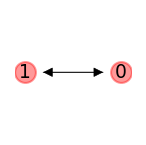

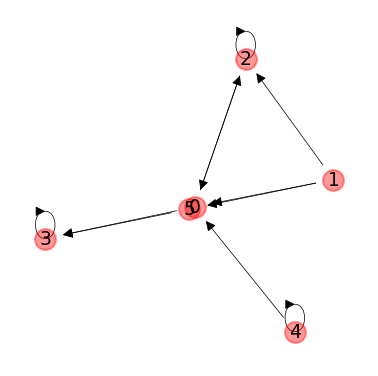

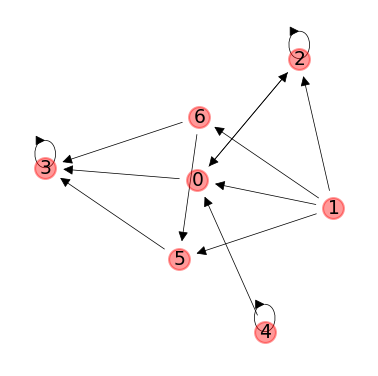

In [9]:
i=0
print(len(GraphsN3_SinCos2_Reps[i]))

Net_Plot(GraphsN3_SinCos2_Reps[i][0],1)
Net_Plot(GraphsN3_SinCos2_Reps[i][8],3)
Net_Plot(GraphsN3_SinCos2_Reps[i][-1],3)

In [10]:
GraphsN3_SinCos2_Reps[0][-1].edges(data=True)

OutEdgeDataView([(0, 2, {}), (0, 3, {}), (1, 0, {}), (1, 2, {}), (1, 5, {}), (1, 6, {}), (2, 0, {}), (2, 2, {}), (3, 3, {}), (4, 0, {}), (4, 4, {}), (5, 3, {}), (6, 5, {}), (6, 3, {})])

In [11]:
import networkx as nx

# Assuming you have a DiGraph named 'G'
G = GraphsN3_SinCos2_Reps[0][0]

# Print features of each node
for node, data in G.nodes(data=True):
    print(f"Node {node}:")
    print(f"  Connections: {list(G.successors(node))}")  # List of successors (outgoing edges)
    # You can access other attributes of nodes if you have assigned them while adding nodes
    # For example, if you have assigned a 'weight' attribute to nodes, you can access it like this:
    #print(f"  Weight: {data['weight']}")


Node 0:
  Connections: [1]
Node 1:
  Connections: [0]


## GANs

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import networkx as nx
import matplotlib.pyplot as plt

# Set the maximum number of nodes in the network
max_nodes = 50

# Function to generate a random network
def generate_random_network(num_nodes):
    # Generate a random adjacency matrix
    adj_matrix = np.random.randint(0, 2, size=(num_nodes, num_nodes))
    
    # Make the adjacency matrix symmetric
    adj_matrix = (adj_matrix + adj_matrix.T) / 2
    
    # Convert the adjacency matrix to a list of connections
    connections = []
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if adj_matrix[i, j] == 1:
                connections.append((i, j))
    
    return connections

# Convert a list of connections to an adjacency matrix
def connections_to_adj_matrix(connections, num_nodes):
    adj_matrix = np.zeros((num_nodes, num_nodes))
    for i, j in connections:
        adj_matrix[i, j] = 1
        adj_matrix[j, i] = 1
    return adj_matrix[:num_nodes, :num_nodes]

# Define the generator model
def build_generator(latent_dim, num_nodes):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(num_nodes * num_nodes, activation='sigmoid'))
    model.add(Reshape((num_nodes, num_nodes)))
    return model

# Define the discriminator model
def build_discriminator(num_nodes):
    model = Sequential()
    model.add(Flatten(input_shape=(num_nodes, num_nodes)))
    model.add(Dense(512, activation='leaky_relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='leaky_relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Train the GAN
def train_gan(generator, discriminator, gan, X_train, epochs, batch_size, sample_interval):
    optimizer = Adam(0.0002, 0.5)
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, len(X_train), batch_size)
        real_networks = [connections_to_adj_matrix(X_train[i], max_nodes) for i in idx]
        real_networks = np.array(real_networks)
        
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_networks = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(real_networks, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_networks, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
        # Print progress
        print(f"Epoch {epoch}/{epochs}, D_loss: {d_loss:.4f}, G_loss: {g_loss:.4f}")
        
        # Generate and save sample networks
        if epoch % sample_interval == 0:
            sample_networks(generator, epoch)

# Generate and save sample networks
def sample_networks(generator, epoch):
    noise = np.random.normal(0, 1, (16, 100))
    generated_networks = generator.predict(noise)
    
    for i in range(16):
        # Convert the generated network to a list of connections
        connections = []
        for j in range(max_nodes):
            for k in range(j+1, max_nodes):
                if generated_networks[i, j, k] > 0.5:
                    connections.append((j, k))
        
        # Save the generated network
        # get the current directory
        cwd = os.getcwd()
        path = os.path.join(cwd, "generated_networks")
        np.save(f"{path}/generated_network_{epoch}_{i}.npy", connections)

# Function to plot the generated network
def plot_generated_network(epoch, sample_index):
    # Load the generated network
    generated_network = np.load(f"generated_network_{epoch}_{sample_index}.npy")
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges to the graph based on the generated network
    for connection in generated_network:
        G.add_edge(connection[0], connection[1])
    
    # Plot the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, arrowsize=10)
    plt.title(f"Generated Network (Epoch {epoch}, Sample {sample_index})")
    plt.show()

# Function to plot the generated network
def plot_generated_network_var(connections, title="Generated Network"):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges to the graph based on the provided connections
    G.add_edges_from(connections)
    
    # Plot the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, arrowsize=10)
    plt.title(title)
    plt.show()

2024-04-16 21:14:16.582522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:14:17.524860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
len(GraphsN3_SinCos2_Reps[0])
GraphsN3_SinCos2_Reps[1][-1].edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 1}), (0, 4, {}), (1, 0, {'weight': 1}), (2, 2, {}), (2, 4, {}), (2, 5, {}), (3, 3, {}), (3, 6, {}), (4, 4, {}), (4, 5, {}), (5, 2, {})])

In [14]:
X_train = []

temp = [i[-1].edges(data=True) for i in GraphsN3_SinCos2_Reps]
temp = [list(i) for i in temp]
for network in temp:
    temp_2 = []
    for node in network:
        temp_2.append((node[0], node[1]))
    X_train.append(temp_2)

X_train[1]

[(0, 1),
 (0, 4),
 (1, 0),
 (2, 2),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 6),
 (4, 4),
 (4, 5),
 (5, 2)]

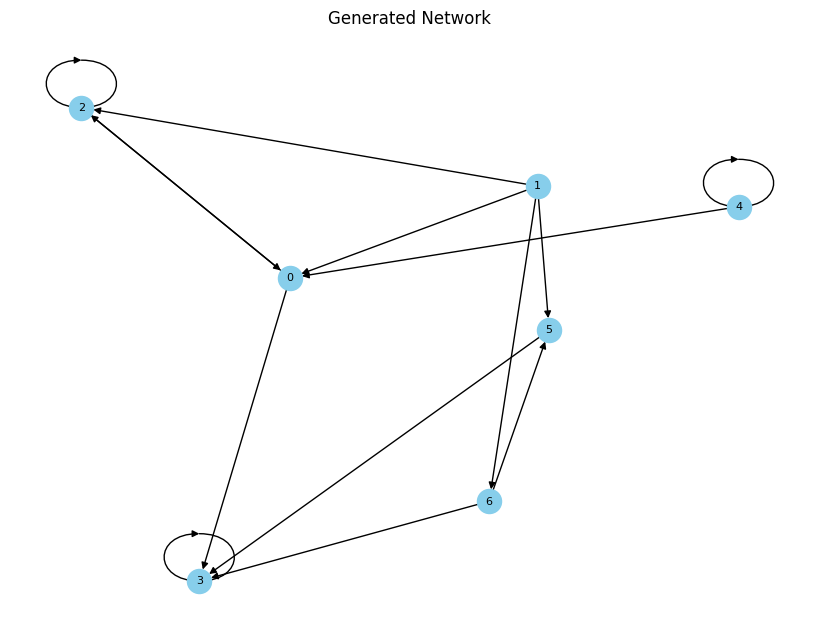

In [15]:
plot_generated_network_var(X_train[0])

In [16]:
# Example usage
num_nodes = 50
latent_dim = 100
epochs = 1000
batch_size = 16
sample_interval = 10

# Generate random networks as training data
#X_train = [generate_random_network(num_nodes) for _ in range(1000)]
#X_train = [i[-1] for i in GraphsN3_SinCos2_Reps]


# Build the GAN
generator = build_generator(latent_dim, num_nodes)
discriminator = build_discriminator(num_nodes)
print('Hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii ')
gan = build_gan(generator, discriminator)

# Train the GAN
train_gan(generator, discriminator, gan, X_train, epochs, batch_size, sample_interval)

/home/mehdi/Desktop/GAN_PDNE/gan/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-16 21:14:18.465134: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 21:14:18.528018: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

Hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii 


I0000 00:00:1713294859.350447  132431 service.cc:145] XLA service 0x70a214007250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713294859.350499  132431 service.cc:153]   StreamExecutor device (0): Tesla P40, Compute Capability 6.1
2024-04-16 21:14:19.365907: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-16 21:14:19.452557: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-04-16 21:14:19.476411: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:321] INTERNAL: ptxas 12.3.103 has a bug that we think can affect XLA. Please use a different version.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


: 